In [290]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from scipy import stats

# Import the Logistic Regression class
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_confusion_matrix
from sklearn.linear_model import LogisticRegressionCV

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.utils import shuffle
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , classification_report,ConfusionMatrixDisplay,precision_score,recall_score, f1_score,roc_auc_score,roc_curve, balanced_accuracy_score

import pickle

from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
print('done importing')

done importing


In [291]:
dm_raw = pd.read_csv("diabetes2.csv")
dm_raw.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


Describe columns

Age: 13-level age category (_AGEG5YR see codebook)

1 = 18-24 / 2 = 25-29 / 3 = 30-34 / 4 = 35-39 / 5 = 40-44 / 6 = 45-49 / 7 = 50-54 / 8 = 55-59 / 9 = 60-64 / 10 = 65-69 / 11 = 70-74 / 12 = 75-79 / 13 = 80 or older

Sex: patient's gender (1: male; 0: female)

HighChol: 0 = no high cholesterol 1 = high cholesterol

CholCheck: 0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years

BMI: Body Mass Index

Smoker: Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes

HeartDiseaseorAttack: coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes

PhysActivity: physical activity in past 30 days - not including job 0 = no 1 = yes

Fruits: Consume Fruit 1 or more times per day 0 = no 1 = yes

Veggies: Consume Vegetables 1 or more times per day 0 = no 1 = yes

HvyAlcoholConsump: (adult men >=14 drinks per week and adult women>=7 drinks per week) 0 = no 1 = yes

GenHlth: Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor

MentHlth: days of poor mental health scale 1-30 days

PhysHlth: physical illness or injury days in past 30 days scale 1-30

DiffWalk: Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes

Stroke: you ever had a stroke. 0 = no, 1 = yes

HighBP: 0 = no high, BP 1 = high BP

Diabetes: 0 = no diabetes, 1 = diabetes

In [292]:
#get column names
dm_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [293]:
#No null variable

In [294]:
#select variables that are medically likely to predict diabetes
dm = dm_raw[["Age","Sex","HighChol","BMI","Smoker","PhysActivity","PhysHlth","Fruits","Veggies","HvyAlcoholConsump","Stroke","HighBP","Diabetes"]]
dm.head()

,Age,Sex,HighChol,BMI,Smoker,PhysActivity,PhysHlth,Fruits,Veggies,HvyAlcoholConsump,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,26.0,0.0,1.0,30.0,0.0,1.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,26.0,0.0,1.0,10.0,1.0,1.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,28.0,1.0,1.0,3.0,1.0,1.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [295]:
dm.shape

(70692, 13)

In [296]:
#check unique values
unique_values = {}
for col in dm.columns:
    unique_values[col] = dm[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
Age,13
Sex,2
HighChol,2
BMI,80
Smoker,2
PhysActivity,2
PhysHlth,31
Fruits,2
Veggies,2
HvyAlcoholConsump,2


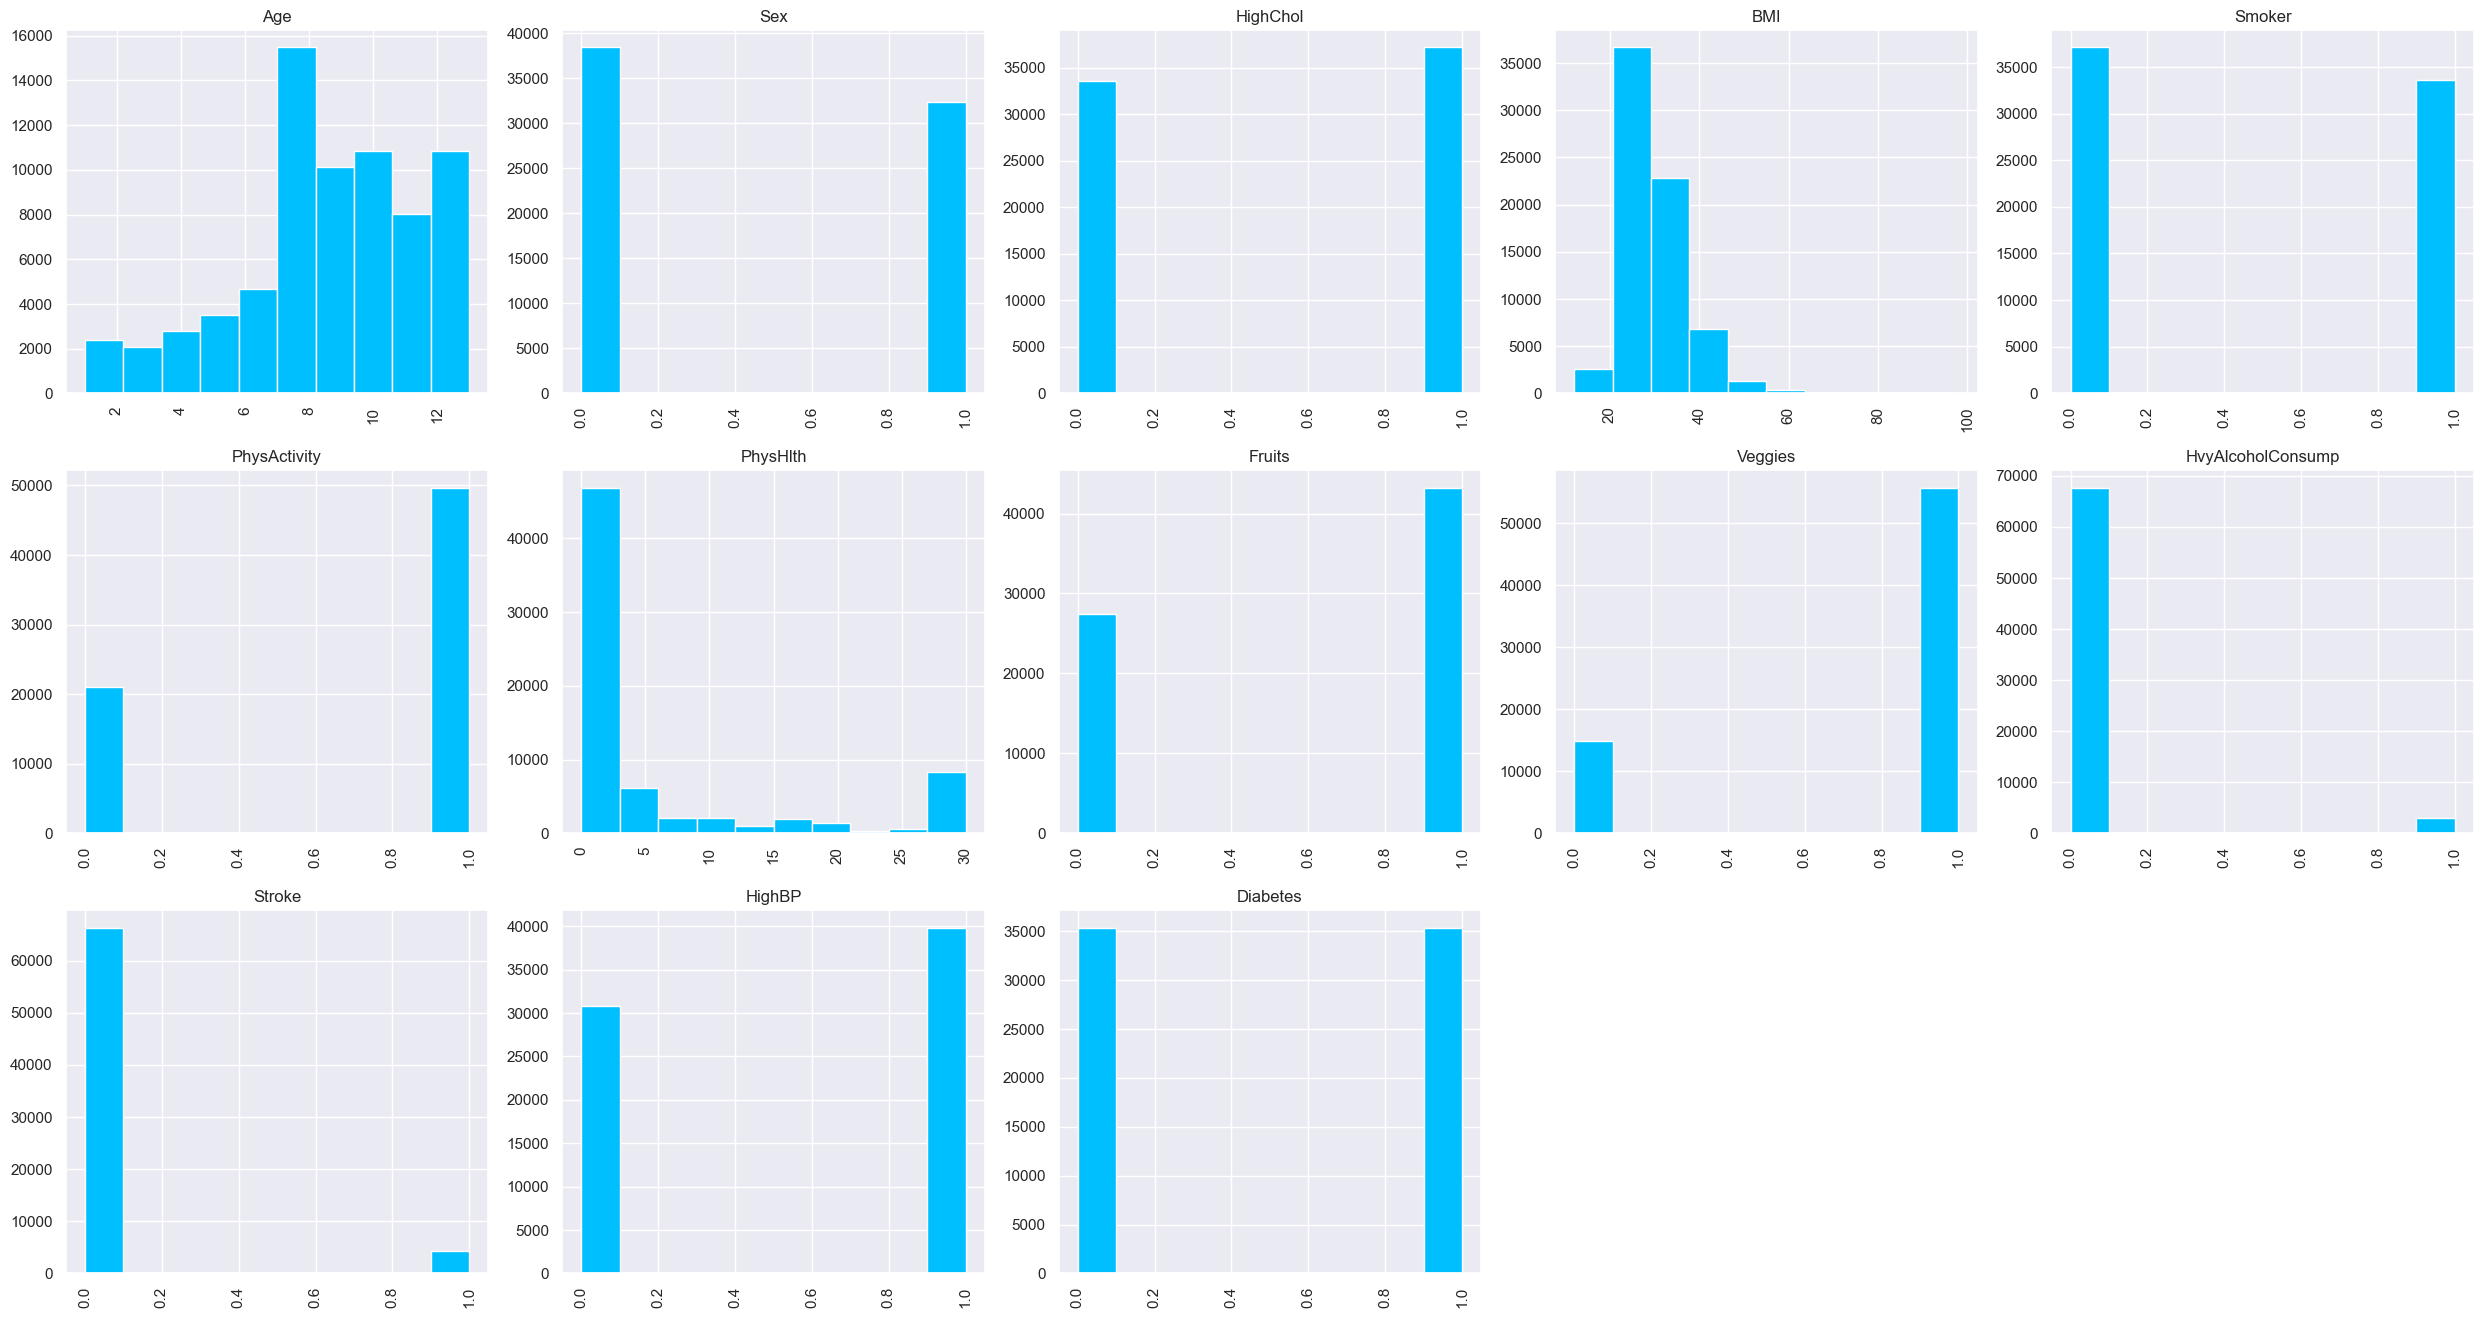

In [297]:
#check frequency of all values in the column

# All data columns except for color
feature_cols = [x for x in dm.columns if x not in 'stroke']
plt.figure(figsize=(25,35))
# loop for subplots
for i in range(len(feature_cols)):
    plt.subplot(8,5,i+1)
    plt.title(feature_cols[i])
    plt.xticks(rotation=90)
    plt.hist(dm[feature_cols[i]],color = "deepskyblue")
    
plt.tight_layout()

In [298]:
#we should drop the columns with very small categories- (HvyAlcoholConsump and stroke)
dm.drop(['HvyAlcoholConsump','Stroke'], axis=1, inplace=True)

<Axes: title={'center': 'Correlation with Diabetes'}>

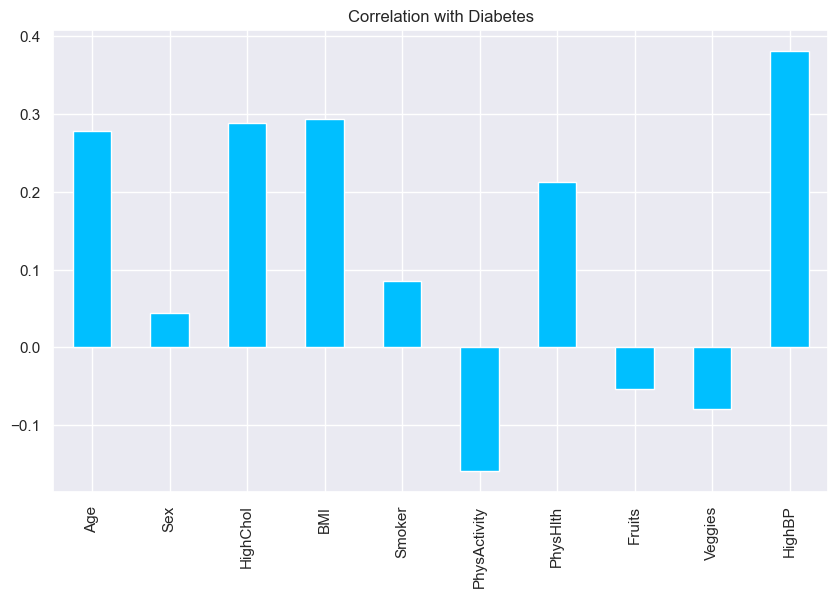

In [299]:
#check correlation of other columns with diabetes column
dm.drop('Diabetes', axis=1).corrwith(dm.Diabetes).plot(kind='bar', grid=True, figsize=(10, 6), title="Correlation with Diabetes",color="deepskyblue")

In [300]:
#variables with correlation less than 0.1 are Sex, Smoker, Fruits, Veggies

<Axes: >

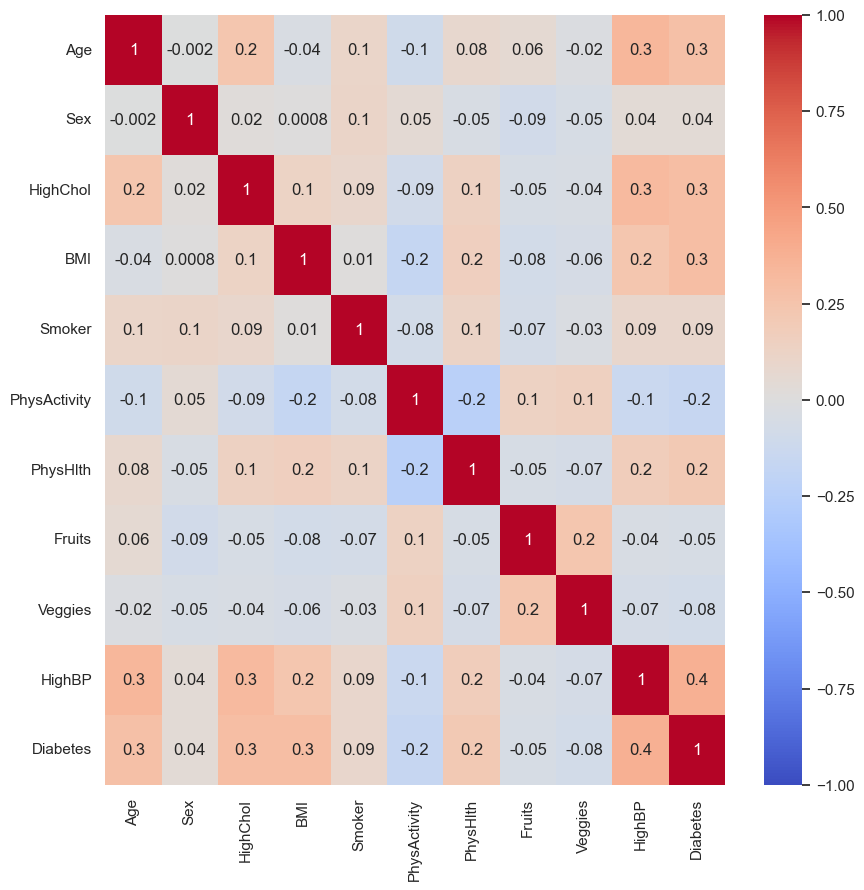

In [301]:
# Correlation between any two features
# check for possible co-variates

sns.set(rc = {'figure.figsize':(10,10)})
sns.heatmap(dm.corr(),vmin=-1, vmax=1, annot = True, fmt='.1g',cmap= 'coolwarm')

In [302]:
#drop the variables with low correlations Sex, Smoker, Fruits, Veggies
dm.drop(['Sex','Smoker','Fruits','Veggies'], axis=1, inplace=True)

In [303]:
dm.head()

,Age,HighChol,BMI,PhysActivity,PhysHlth,HighBP,Diabetes
0,4.0,0.0,26.0,1.0,30.0,1.0,0.0
1,12.0,1.0,26.0,0.0,0.0,1.0,0.0
2,13.0,0.0,26.0,1.0,10.0,0.0,0.0
3,11.0,1.0,28.0,1.0,3.0,1.0,0.0
4,8.0,0.0,29.0,1.0,0.0,0.0,0.0


In [304]:
dm.tail()

,Age,HighChol,BMI,PhysActivity,PhysHlth,HighBP,Diabetes
70687,6.0,1.0,37.0,0.0,0.0,0.0,1.0
70688,10.0,1.0,29.0,0.0,0.0,0.0,1.0
70689,13.0,1.0,25.0,0.0,0.0,1.0,1.0
70690,11.0,1.0,18.0,0.0,0.0,1.0,1.0
70691,9.0,1.0,25.0,1.0,0.0,1.0,1.0


In [305]:
#narrowed down to 6 possible determinants 
#determine which predictors are more useful

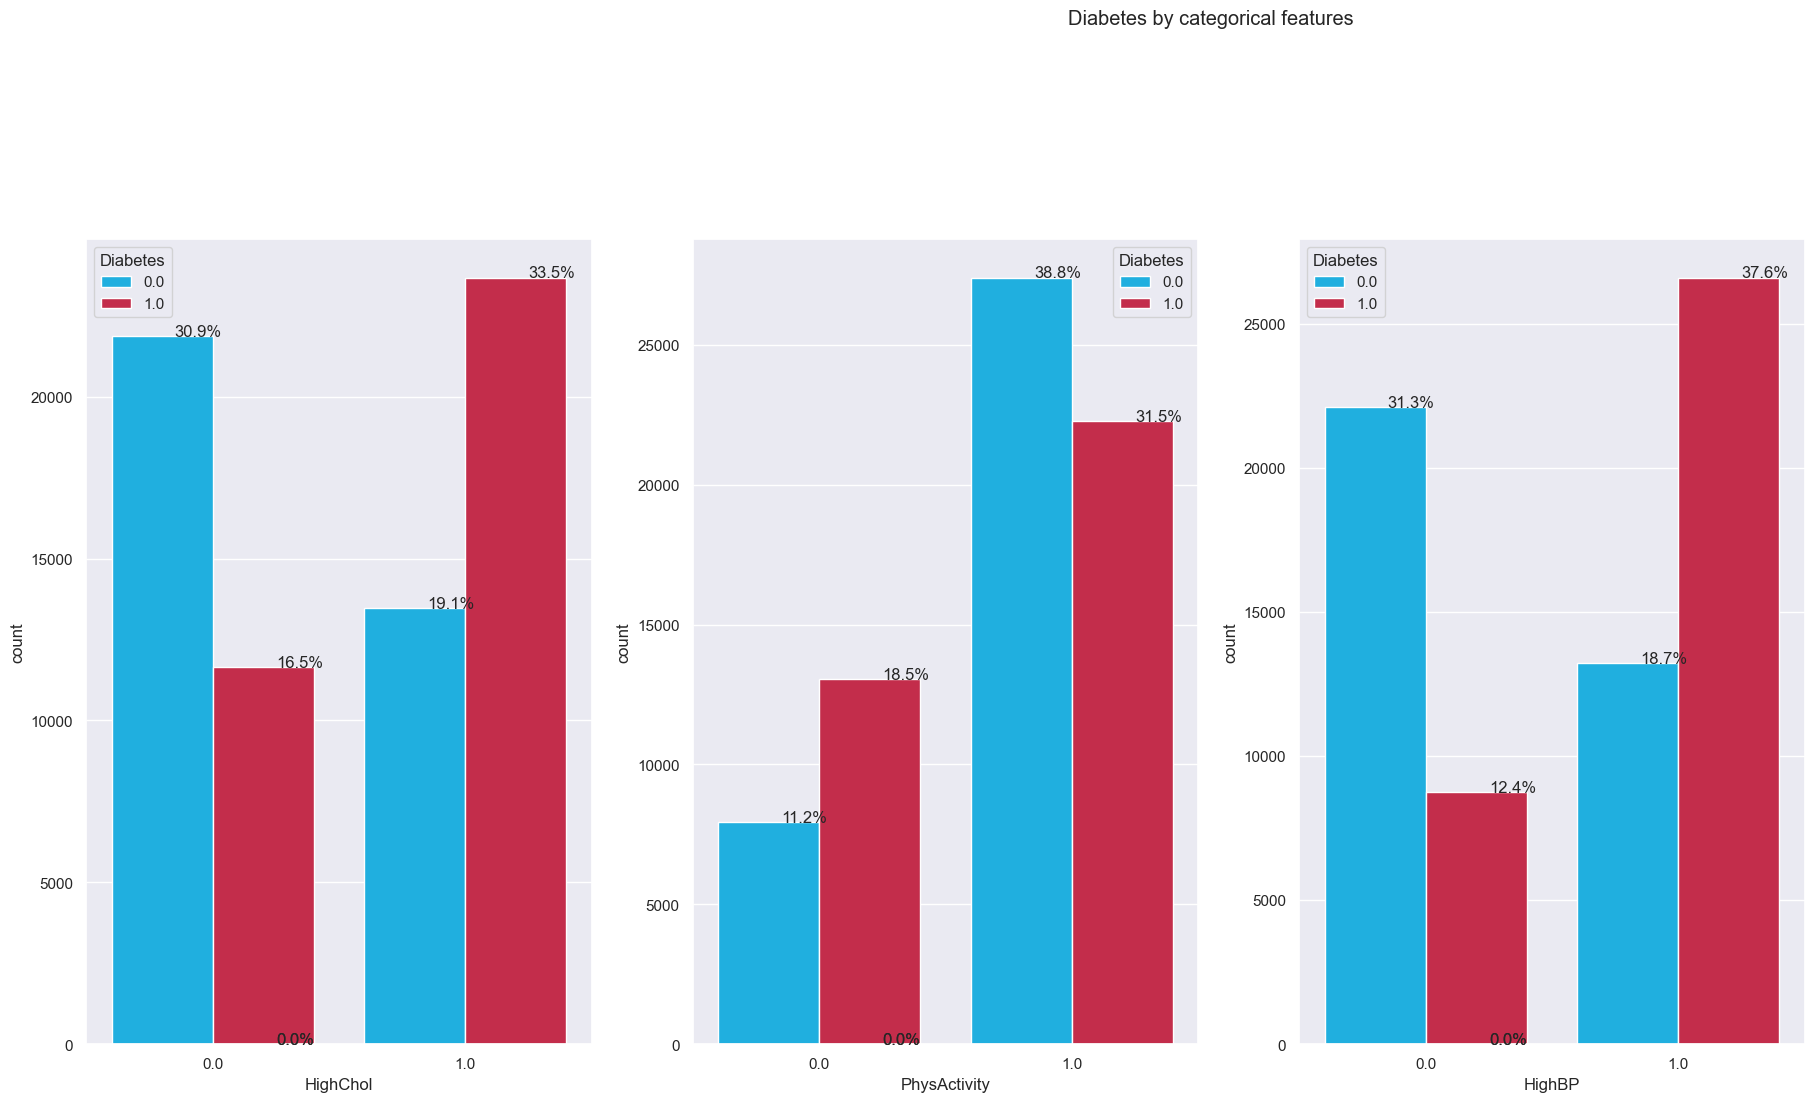

In [306]:
# Bivariate bar plot for categorical variables

features = [x for x in dm.columns if x not in ['Age','BMI','PhysHlth','Diabetes']]
plt.figure(figsize = (30,23))
plt.suptitle('Diabetes by categorical features')

#subplots
for i in enumerate(features):
    plt.subplot(2,4, i[0]+1)   
    x = sns.countplot(data=dm, x=i[1], hue='Diabetes', palette = ['deepskyblue','crimson'])
    for z in x.patches:
      x.annotate('{:.1f}'.format((z.get_height()/dm.shape[0])*100)+'%',(z.get_x()+0.25, z.get_height()+0.01))

<Figure size 1200x500 with 0 Axes>

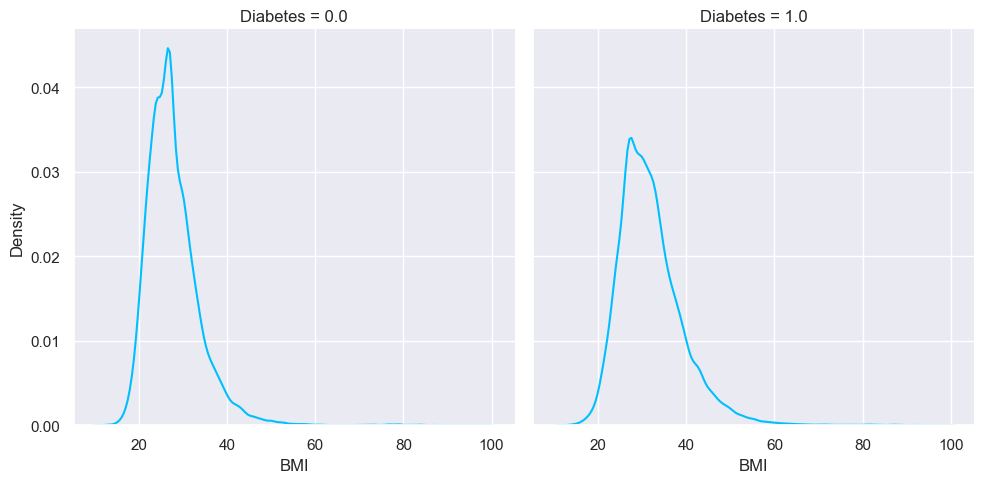

In [307]:
#for numeric variables
plt.figure(figsize=(12,5))
sns.displot(x='BMI', col='Diabetes' , data = dm, kind="kde" ,color = 'deepskyblue')

<Figure size 1200x2000 with 0 Axes>

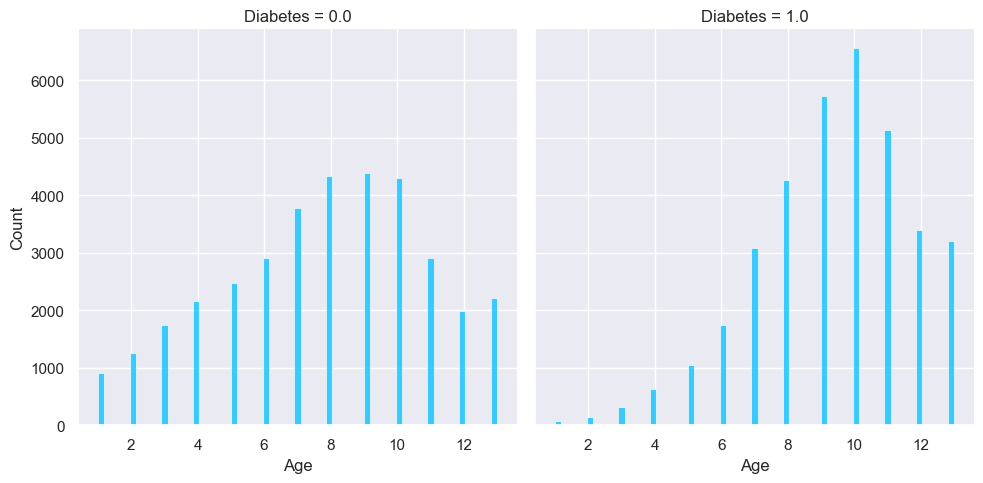

In [308]:
plt.figure(figsize=(12,20))
sns.displot(data=dm,col='Diabetes',x='Age',color='deepskyblue')

In [309]:
#Check skewness
#can only be checked for numeric data

dm_skew = dm[['Age','BMI','PhysHlth']]
skew = pd.DataFrame(dm_skew.skew())
skew.columns = ['skew']
skew['too_skewed'] = skew['skew'] > .75
skew

,skew,too_skewed
Age,-0.545923,False
BMI,1.719180,True
PhysHlth,1.657304,True


In [310]:
#BMI and PhysHlth are skewed. It needs to be transformed
#Scaling the data for features selection using the MinMaxScaler method.
#only numeric variables apply here

mms = MinMaxScaler()
dm[['BMI']] = mms.fit_transform(dm[['BMI']])
dm[['Age']] = mms.fit_transform(dm[['Age']])
dm[['PhysHlth']] = mms.fit_transform(dm[['PhysHlth']])
dm.head()

,Age,HighChol,BMI,PhysActivity,PhysHlth,HighBP,Diabetes
0,0.250000,0.0,0.162791,1.0,1.000000,1.0,0.0
1,0.916667,1.0,0.162791,0.0,0.000000,1.0,0.0
2,1.000000,0.0,0.162791,1.0,0.333333,0.0,0.0
3,0.833333,1.0,0.186047,1.0,0.100000,1.0,0.0
4,0.583333,0.0,0.197674,1.0,0.000000,0.0,0.0


In [311]:
#Features Selection - Step 1
#1. Define X,y
y = (dm['Diabetes']).astype(int)
X = dm.loc[:, dm.columns != 'Diabetes']  # everything except "Diabetes"

[0.15654215 0.11259923 0.34590444 0.02297117 0.14270648 0.21927654]


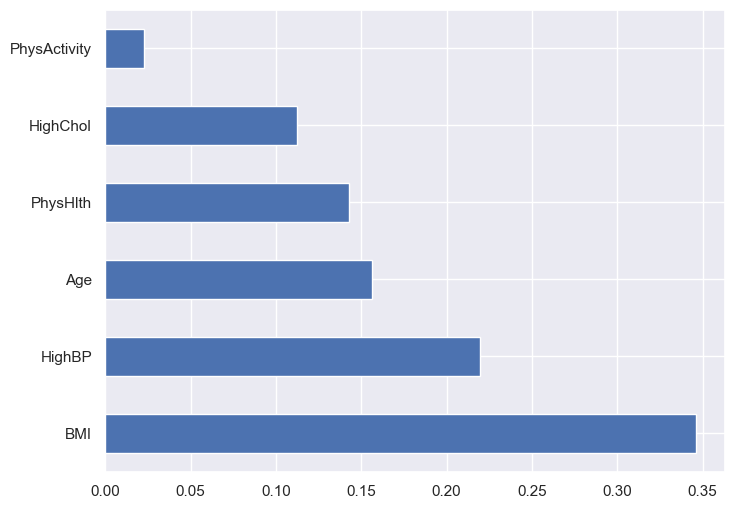

In [312]:
# Features Selection - Step 2

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(8,6))
feat_importances.nlargest(6).plot(kind='barh')
plt.show()

In [313]:
# #method 2   

# #apply SelectKBest class to extract top 5 best features   #Do this before quantile transformation
# bestfeatures = SelectKBest(score_func=chi2, k=5)
# fit = bestfeatures.fit(X,y)
# dfscores = pd.DataFrame(fit.scores_)
# dfcolumns = pd.DataFrame(X.columns)
# #concat two dataframes for better visualization 
# featureScores = pd.concat([dfcolumns,dfscores],axis=1)
# featureScores.columns = ['Specs','Score']  #naming the dataframe columns
# print(featureScores.nlargest(6,'Score'))  #print 5 best features

In [314]:
# #Method 3

# #Create a logistic regression classifier
# lr = LogisticRegression()
# # Create an EFS object
# efs = EFS(estimator=lr,        # Use logistic regression as the classifier/estimator
#           min_features=1,      # The minimum number of features to consider is 1
#           max_features=5,      # The maximum number of features to consider is 5
#           scoring='accuracy',  # The metric to use to evaluate the classifier is accuracy 
#           cv=4)                # The number of cross-validations to perform is 4

# # Train EFS with our dataset
# efs = efs.fit(X, y)
# # Print the results
# print('Best accuracy score: %.2f' % efs.best_score_) # best_score_ shows the best score 
# print('Best subset (indices):', efs.best_idx_)       # best_idx_ shows the index of features that yield the best score 
# print('Best subset (corresponding names):', efs.best_feature_names_) # best_feature_names_ shows the feature names 

In [315]:
#recheck the skew
dm_skew = dm[['Age','BMI','PhysHlth']]
skew = pd.DataFrame(dm_skew.skew())
skew.columns = ['skew']
skew['too_skewed'] = skew['skew'] > .75
skew

,skew,too_skewed
Age,-0.545923,False
BMI,1.719180,True
PhysHlth,1.657304,True


In [316]:
# #use quantile tranformation

# qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')
# dm[['BMI']] = qt.fit_transform(dm[['BMI']])
# dm[['PhysHlth']] = qt.fit_transform(dm[['PhysHlth']])

In [317]:
#recheck the skew
dm_skew = dm[['Age','BMI','PhysHlth']]
skew = pd.DataFrame(dm_skew.skew())
skew.columns = ['skew']
skew['too_skewed'] = skew['skew'] > .75
skew

,skew,too_skewed
Age,-0.545923,False
BMI,1.719180,True
PhysHlth,1.657304,True


In [318]:
dm.head()

,Age,HighChol,BMI,PhysActivity,PhysHlth,HighBP,Diabetes
0,0.250000,0.0,0.162791,1.0,1.000000,1.0,0.0
1,0.916667,1.0,0.162791,0.0,0.000000,1.0,0.0
2,1.000000,0.0,0.162791,1.0,0.333333,0.0,0.0
3,0.833333,1.0,0.186047,1.0,0.100000,1.0,0.0
4,0.583333,0.0,0.197674,1.0,0.000000,0.0,0.0


Model Building and Testing

In [319]:
#Data splitting

y = (dm['Diabetes']).astype(int)
X = dm.loc[:, dm.columns != 'stroke']  # everything except "stroke"
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [320]:
X_train.shape

(49484, 7)

In [321]:
X_test.shape

(21208, 7)

In [322]:
# Initialize the Logistic Regression model
logreg_model = LogisticRegression()

# Train the model on the training data
logreg_model.fit(X_train, y_train)

# Predict on the test data
y_pred = logreg_model.predict(X_test)


# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

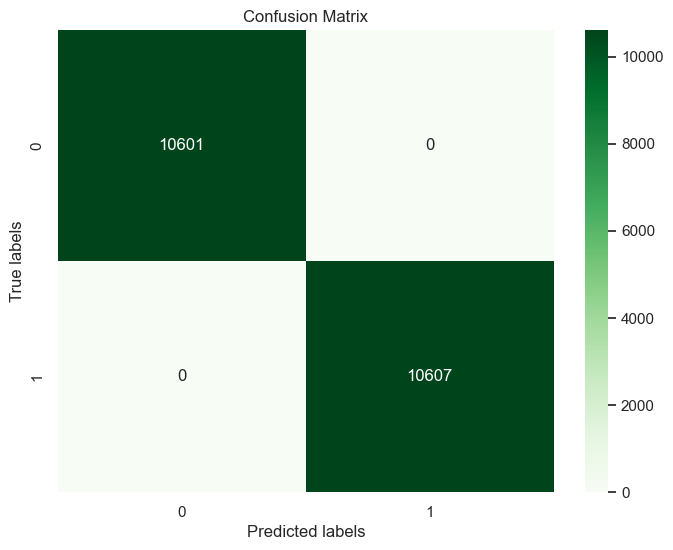

In [323]:
# Make predictions on the test set
# y_pred = model.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [324]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC AUC Score: 1.0


In [325]:
#function that get y_test and calculate into df all the relevant metric
def train_evaluate_model(y_test):
    #fit the model instance 
    predictions = y_pred # calculate predictions

    #compute metrics for evaluation
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    balanced_accuracy = balanced_accuracy_score(y_test, predictions)
    auc = roc_auc_score(y_test, predictions)

    #create a dataframe to visualize the results
    eval_df = pd.DataFrame([[accuracy, f1, precision, recall, balanced_accuracy, auc]], columns=['accuracy', 'f1_score', 'precision', 'recall', 'balanced_accuracy', 'auc'])
    return eval_df

In [326]:
#model metrics

results = train_evaluate_model(y_test)
results.index = ['Logistic Regression']
results.style.background_gradient(cmap = sns.color_palette("blend:green,red", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
Logistic Regression,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [327]:
# Define hyperparameters grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}  # Regularization parameter

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best model for prediction
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Best Parameters: {'C': 0.001}
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC AUC Score: 1.0


In [328]:
# Save the model to a file
with open('diabetes_2_LR2.pkl', 'wb') as f:
    pickle.dump(model, f)

In [329]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [330]:
# Save the scaler object to a file using pickle
with open('min_max_scaler2.pkl', 'wb') as file:
    pickle.dump(scaler, file)